In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import gmaps
from pprint import pprint
from us import states



salesdatabymodel = pd.read_excel('Datasets/SalesByModel_Updated4.6.xlsx')

salesdatabymodel = salesdatabymodel.fillna(0)
salesdatabymodel.head()

,Maker,Model,Type,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Acura,MDX,HEV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1807.0
1,Acura,RLX,HEV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,133.0,250.0,199.0,292.0
2,Acura,NSX,HEV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267.0,581.0
3,Acura,ILX,HEV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,972.0,1461.0,379.0,22.0,1.0,0.0
4,Audi,Q5 Hybrid,HEV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,270.0,854.0,283.0,97.0,18.0,0.0


In [26]:

testDF = salesdatabymodel.groupby(['Type','Maker','Model']).mean()

testDF = testDF.stack()

testDF.head(100)
testDF.index.set_names('Years',level=len(testDF.index.names)-1, inplace=True)
testDF =testDF.reset_index().rename(columns={0:'Sales'})
testDF2 = testDF.loc[testDF['Maker']=='Nissan',:]
testDF2.head(120)

,Type,Maker,Model,Years,Sales
931,HEV,Nissan,Altima,1999,0.0
932,HEV,Nissan,Altima,2000,0.0
933,HEV,Nissan,Altima,2001,0.0
934,HEV,Nissan,Altima,2002,0.0
935,HEV,Nissan,Altima,2003,0.0
936,HEV,Nissan,Altima,2004,0.0
937,HEV,Nissan,Altima,2005,0.0
938,HEV,Nissan,Altima,2006,0.0
939,HEV,Nissan,Altima,2007,8388.0
940,HEV,Nissan,Altima,2008,8819.0


In [4]:
#Exported to CSV on 4.6.19
#testDF.to_csv('Datasets\ModelYearPivot.csv')

In [5]:
x_years = set(testDF['Years'])
print(x_years)

{1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017}


In [6]:
HEVmakersalessum = testDF.loc[testDF['Type'] == 'HEV',:]
HEVmakersalessum = HEVmakersalessum.groupby(['Years']).aggregate({'Sales':'sum'})

PEVmakersalessum = testDF.loc[testDF['Type'] == 'PEV',:]
PEVmakersalessum = PEVmakersalessum.groupby(['Years']).aggregate({'Sales':'sum'})
PEVmakersalessum.head()

,Sales
Years,
1999,0.0
2000,0.0
2001,0.0
2002,0.0
2003,0.0


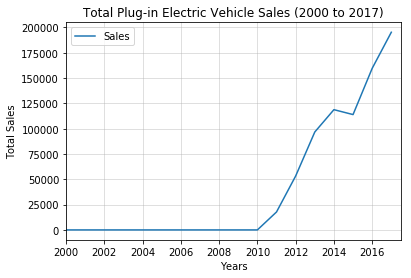

In [23]:

fig = PEVmakersalessum.plot(xlim= (2000,2017.5))

fig.set_title('Total Plug-in Electric Vehicle Sales (2000 to 2017)')
fig.set_ylabel('Total Sales')
fig.grid(alpha = .5)

fig = fig.get_figure()
fig.savefig('Plots and Maps\PEV Sales')



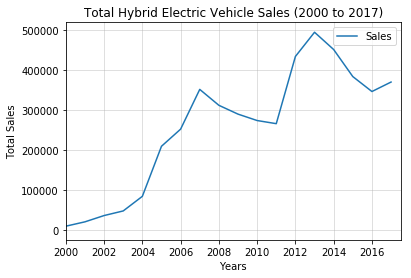

In [22]:
fig2 = HEVmakersalessum.plot(xlim =(2000,2017.5))
fig2.set_title('Total Hybrid Electric Vehicle Sales (2000 to 2017)')
fig2.set_ylabel('Total Sales')
fig2.grid(alpha = .5)


fig2 = fig2.get_figure()
fig2.savefig('Plots and Maps\HEV Sales')

In [9]:
debutYear = pd.read_csv('Datasets\ModelYearPivot.csv',index_col = 0)

In [10]:
debutYear = debutYear[['Type','Maker','Model','Debut']]

In [11]:
debutYear.head()

,Type,Maker,Model,Debut
0,HEV,Acura,ILX,2012
1,HEV,Acura,ILX,2012
2,HEV,Acura,ILX,2012
3,HEV,Acura,ILX,2012
4,HEV,Acura,ILX,2012


In [12]:
debutYear = debutYear.drop_duplicates()

In [13]:
debutYear.head()

,Type,Maker,Model,Debut
0,HEV,Acura,ILX,2012
19,HEV,Acura,MDX,2017
38,HEV,Acura,NSX,2017
57,HEV,Acura,RLX,2014
76,HEV,Audi,Q5 Hybrid,2012


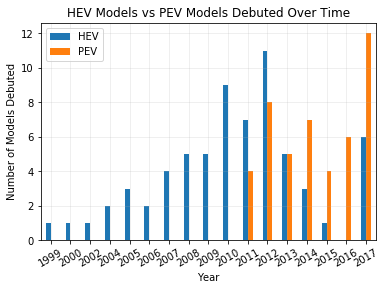

In [14]:
debutYeargb = debutYear.groupby(['Debut', 'Type']).aggregate({"Model":'count'})

fig = debutYeargb.unstack().plot(kind = 'bar', rot = 30)
fig.legend(['HEV','PEV'])
fig.grid(alpha = .25)
fig.set_xlabel('Year')
fig.set_ylabel('Number of Models Debuted')
fig.set_title('HEV Models vs PEV Models Debuted Over Time')
fig = fig.get_figure()
fig.savefig('Plots and Maps\HEV vs PEV Models Debuted')